# Calculation of Linear Spine Deviation

### 1. Import relevant libraries

In [1]:
import cv2
import numpy as np 
from skimage import measure
import imutils
from imutils import contours
from matplotlib import pyplot as plt 

### 2. Crop image and apply Gaussian blur

In [2]:
img = cv2.imread("back.jpg")
original = img.copy()
x1 = int(225/2-15)
x2 = int(225/2+15)
img = img[:, x1:x2]
color = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img,(5,5),0)

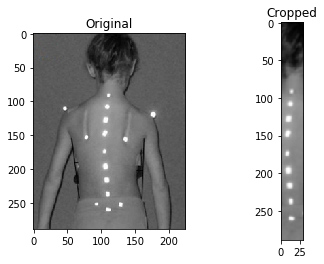

In [3]:
plt.subplot(1,2,1)
plt.imshow(original)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(img, cmap = plt.cm.gray)
plt.title('Cropped')
plt.show()

### 3. Thresholding and Dilation
Thresholding reduces the image to relevant areas of interest. Dilation is done for ease of spot detection.

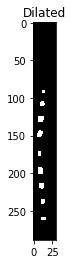

In [4]:
ret,img = cv2.threshold(img,230,255,cv2.THRESH_BINARY)
img  = cv2.dilate(img, None, iterations=1)
plt.imshow(img, cmap = plt.cm.gray)
plt.title('Dilated')
plt.show()

### 4. Masking and Contour Detection

In [5]:
labels = measure.label(img, neighbors=8, background=0)
mask = np.zeros(img.shape, dtype="uint8")

for label in np.unique(labels):
    if(label==0):
        continue
        
    labelMask = np.zeros(img.shape, dtype="uint8")
    labelMask[labels==label] = 255
    numPixels = cv2.countNonZero(labelMask)
    
    if(numPixels>0):
        mask = cv2.add(mask, labelMask)
        
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = contours.sort_contours(cnts)[0]
contours = cnts

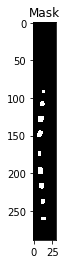

In [6]:
plt.imshow(img, cmap = plt.cm.gray)
plt.title('Mask')
plt.show()

### 5. Reduction of each marker to a single pixel
Each marker is reduced to a single pixel by averaging over the points corresponding to that marker

In [7]:
average_x = []
average_y = []

# Calculation of average x and y coordinates of the markers
for contour in contours:
    
    x,y = 0,0

    for point in contour:
    
        x = x + point[0][0]
        y = y + point[0][1]
  
    average_x.append(x/len(contour))
    average_y.append(y/len(contour))  
        
average_x, average_y = np.array(average_x), np.array(average_y)

### 6. Locating relevant points for estimation of linear deviation
The left most, highest and lowest points are calculated for estimating the linear deviation of the spine.

In [8]:
left_most = np.argmin(average_x)
highest = np.argmax(average_y)
lowest = np.argmin(average_y)

Code for plotting the relevant points

In [9]:
(x, y, w, h) = cv2.boundingRect(contours[highest])
((cX, cY), radius) = cv2.minEnclosingCircle(contours[highest])
color = cv2.circle(color, (int(cX), int(cY)), int(radius),(255, 0, 0), 3)

(x, y, w, h) = cv2.boundingRect(contours[lowest])
((cX, cY), radius) = cv2.minEnclosingCircle(contours[lowest])
color = cv2.circle(color, (int(cX), int(cY)), int(radius),(255, 0, 0), 3)

(x, y, w, h) = cv2.boundingRect(cnts[left_most])
((cX, cY), radius) = cv2.minEnclosingCircle(cnts[left_most])
color = cv2.circle(color, (int(cX), int(cY)), int(radius),(255, 0, 0), 3)

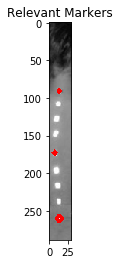

In [10]:
plt.imshow(color)
plt.title('Relevant Markers')
plt.show()

### Calculation of linear deviation

In [11]:
center = (average_x[highest] + average_x[lowest])/2
deviation = center - average_x[left_most]
length = average_y[highest] - average_y[lowest]
normalized_deviation = deviation/length*100
print("Deviation: ", normalized_deviation)

Deviation:  3.17931326833404
